In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle
from random import shuffle
from collections import Counter, defaultdict

In [2]:
snippet_pos = pickle.load(open('snippet_pos.p', 'rb'))

In [3]:
full_feature_samples, semi_feature_samples, bin_feature_samples, baseline_samples, random_samples = pickle.load(open('samples.p', 'rb'))

In [4]:
full_feature_mined = [0]
full_feature_pos = [0]
for _, pid, intent, code, x, is_annotated in full_feature_samples:
    full_feature_mined.append(full_feature_mined[-1] + 1)
    full_feature_pos.append(full_feature_pos[-1] + int(is_annotated))
    #print 'post_id:'
    #print pid
    #print 'intent:'
    #print intent
    #print 'code:'
    #print code
    #print 'features:'
    #print x
    #print 'confidence:'
    #print _[1]
    #print '----------------------------\n\n\n'

In [5]:
semi_feature_mined = [0]
semi_feature_pos = [0]
for _, pid, intent, code, x, is_annotated in semi_feature_samples:
    semi_feature_mined.append(semi_feature_mined[-1] + 1)
    semi_feature_pos.append(semi_feature_pos[-1] + int(is_annotated))

In [6]:
bin_feature_mined = [0]
bin_feature_pos = [0]
for _, pid, intent, code, x, is_annotated in bin_feature_samples:
    bin_feature_mined.append(bin_feature_mined[-1] + 1)
    bin_feature_pos.append(bin_feature_pos[-1] + int(is_annotated))

In [7]:
random_mined = [0]
random_pos = [0]
for pid, intent, code, is_annotated in random_samples:
    random_mined.append(random_mined[-1] + 1)
    random_pos.append(random_pos[-1] + int(is_annotated))

In [8]:
baseline_mined = [len(baseline_samples)]
baseline_pos = [sum(1 for pid, intent, code, is_annotated in baseline_samples if is_annotated)]

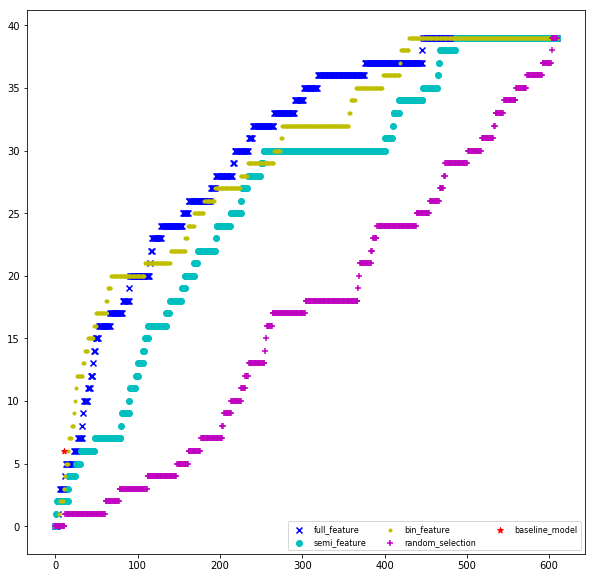

In [9]:
plt.figure(figsize=(10, 10))
ax = plt.subplot()
colors = ['b', 'c', 'y', 'm', 'r']

full_feature = plt.scatter(full_feature_mined, full_feature_pos, marker='x', color=colors[0])
semi_feature = plt.scatter(semi_feature_mined, semi_feature_pos, marker='o', color=colors[1])
bin_feature  = plt.scatter(bin_feature_mined, bin_feature_pos, marker='.', color=colors[2])
random_selection  = plt.scatter(random_mined, random_pos, marker='+', color=colors[3])
baseline_model  = plt.scatter(baseline_mined, baseline_pos, marker='*', color=colors[4])


plt.legend((full_feature, semi_feature, bin_feature, random_selection, baseline_model),
           ('full_feature', 'semi_feature', 'bin_feature', 'random_selection', 'baseline_model'),
           scatterpoints=1,
           loc='lower right',
           ncol=3,
           fontsize=8)
#ax.set_xlim([0, 100])
#ax.set_ylim([0, 100])
plt.show()